In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Road Safety Data - Accidents 2019.csv", low_memory=False)
dfCasuality = pd.read_csv("Road Safety Data - Casualties 2019(1).csv")

In [5]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [6]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [7]:
dfCasuality.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile'],
      dtype='object')

### (a)	Are there significant hours of the day, and days of the week, on which accidents occur?

### Days of Week

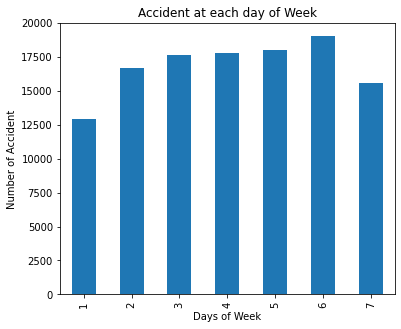

In [8]:
WeekdayAccident = df['Day_of_Week'].value_counts().sort_index()
WeekdayAccident.plot(kind='bar', title='Accident at each day of Week', ylabel='Number of Accident',
         xlabel='Days of Week', figsize=(6, 5))
plt.show()

Above figure depicts the number of accidents at each of a week. It shows that Sixth day (Friday) of the week has highest number of accident. Starting from 1 (Sunday) till 7 (saturday), the highest number of accident occur at Friday. 

#### Clean the Dataset

In [9]:
dfClean = df.dropna()

In [10]:
dfClean.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


### Hours of the day

In [11]:
hours = []
for i,val in enumerate(dfClean['Time']):
    hour = val[0:2]
    hours.append(hour)
    
hours.sort()

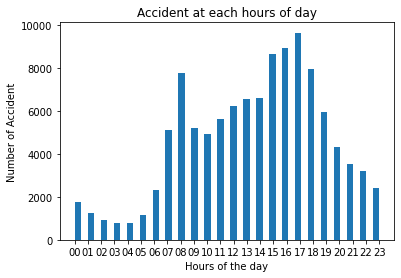

In [12]:
plt.hist(hours,bins=47);
plt.title("Accident at each hours of day")
plt.ylabel("Number of Accident")
plt.xlabel("Hours of the day")
plt.show()

Above figure illustrates the number of accidents at each hours of the day. It is clear from the figure that after 1700 hours to 1800 hours, more number of accidents have been recorded. Figure also depicts that the number of accidents at late night is very few as compare to the after noon time accidents. 

### For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?

In [13]:
dfVehicles = pd.read_csv("Road Safety Data- Vehicles 2019(1).csv", low_memory = False)

In [14]:
dfVehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4


#### Remove negative Values from Vehicles dataframe

In [15]:
dfCleanVeh = dfVehicles[dfVehicles.select_dtypes(include=[np.number]).ge(0).all(1)]

In [16]:
dfCleanVeh.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
105,2019010155425,1,9,0,18,9,0,0,0,7,...,6,1,23,5,2996,1,1,2,1,2
182,2019010155627,2,9,0,18,0,8,0,0,0,...,6,1,40,7,1388,1,14,5,1,5
201,2019010155655,1,8,0,9,0,1,0,0,0,...,1,1,48,8,1798,8,7,3,1,3
415,2019010156081,1,19,0,18,0,1,0,0,0,...,2,1,46,8,2143,2,1,6,1,6
458,2019010156197,1,3,0,3,0,1,0,0,0,...,6,2,55,8,124,1,11,4,1,4


In [17]:
print(len(df))
print(len(dfVehicles))

117536
216381


In [18]:
Mergdf = dfVehicles.merge(df,left_on='Accident_Index', right_on='Accident_Index')

Merging Casualties data with other datasets

In [19]:
MergdfWithCasuality = Mergdf.merge(dfCasuality, left_on = 'Accident_Index',right_on = 'Accident_Index')

In [20]:
MergdfClean = Mergdf.dropna()
MergdfClean = MergdfClean[MergdfClean.select_dtypes(include=[np.number]).ge(0).all(1)]

MergdfClean.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
620,2019010156538,1,9,0,18,0,8,0,0,0,...,0,0,4,1,1,0,0,1,1,E01000066
622,2019010156538,3,9,0,18,0,4,0,0,0,...,0,0,4,1,1,0,0,1,1,E01000066
760,2019010156785,1,9,0,9,0,1,0,0,0,...,0,0,4,1,4,0,0,1,1,E01033731
1629,2019010158328,2,9,0,9,0,2,0,0,0,...,0,0,4,1,1,0,0,1,1,E01033589
1630,2019010158328,3,19,0,9,0,2,0,0,0,...,0,0,4,1,1,0,0,1,1,E01033589


In [21]:
MergdfMotorBike = MergdfClean[(MergdfClean['Vehicle_Type']==2) | (MergdfClean['Vehicle_Type']==3) | (MergdfClean['Vehicle_Type']==4) | (MergdfClean['Vehicle_Type']==5)|(MergdfClean['Vehicle_Type']==23)|(MergdfClean['Vehicle_Type']==97)]

#### Significant Day of Week and hour of Day 

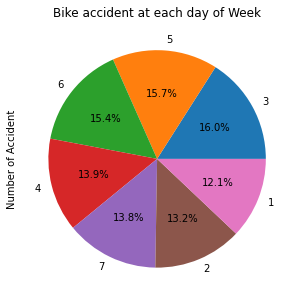

In [22]:
WeekdayAccidentBike = MergdfMotorBike['Day_of_Week'].value_counts()
WeekdayAccidentBike.plot(kind='pie',autopct='%1.1f%%', title='Bike accident at each day of Week', ylabel='Number of Accident',
         xlabel='Days of Week', figsize=(6, 5))
plt.show()

Highest number of accident is reported at Friday (6). Furthermore, Wednesday has the second highest number of recorde accident for bikes. 

In [23]:
hoursBike = []
for i,val in enumerate(MergdfMotorBike['Time']):
    hour = val[0:2]
    hoursBike.append(hour)
    
hoursBike.sort()

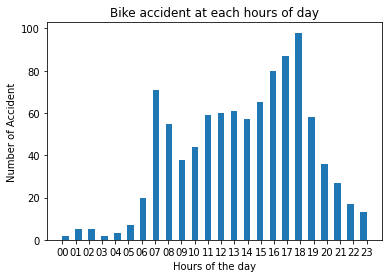

In [24]:
plt.hist(hoursBike,bins=47);
plt.title("Bike accident at each hours of day")
plt.ylabel("Number of Accident")
plt.xlabel("Hours of the day")
plt.show()

For bikes the after noon time is not good enough. More number of accidents recored after 1700 and even after 1600 hours. The afternoon (after 1600) and evening (after 1700 till 1900) time is not good for bikes.  

### (c)	For Pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

In [25]:
MergdfAccidentPedestrian = MergdfClean[(MergdfClean['Pedestrian_Crossing-Human_Control']==1) | (MergdfClean['Pedestrian_Crossing-Human_Control']==2)]

In [26]:
MergdfAccidentPedestrian

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
6524,2019010166527,1,9,0,6,0,1,0,0,0,...,2,1,1,1,1,0,0,1,1,E01004438
6525,2019010166527,2,3,0,13,0,1,0,0,0,...,2,1,1,1,1,0,0,1,1,E01004438
7017,2019010167392,1,9,0,9,0,5,0,0,0,...,2,4,4,2,2,0,0,1,1,E01003773
7949,2019010169211,1,9,0,18,0,1,0,0,0,...,2,4,1,1,1,0,0,1,1,E01000104
9895,2019010172417,1,9,0,7,0,1,0,0,0,...,2,5,1,1,1,0,0,1,1,E01001667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176493,2019470897008,1,9,0,18,0,2,0,0,0,...,2,1,4,2,5,0,0,1,1,E01020938
176834,2019470902958,1,9,0,7,0,6,0,0,0,...,1,1,7,9,1,0,0,1,2,E01020973
178897,2019471901354,1,3,0,18,0,8,1,11,0,...,2,4,1,1,1,5,2,1,1,E01021047
178898,2019471901354,2,9,0,18,0,8,0,0,0,...,2,4,1,1,1,5,2,1,1,E01021047


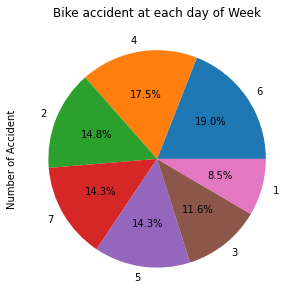

In [27]:
WeekdayAccidentPedestrain = MergdfAccidentPedestrian['Day_of_Week'].value_counts()
WeekdayAccidentPedestrain.plot(kind='pie',autopct='%1.1f%%', title='Bike accident at each day of Week', ylabel='Number of Accident',
         xlabel='Days of Week', figsize=(6, 5))
plt.show()

In [28]:
hoursBike = []
for i,val in enumerate(MergdfAccidentPedestrian['Time']):
    hour = val[0:2]
    hoursBike.append(hour)
    
hoursBike.sort()

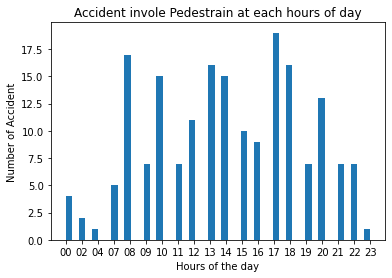

In [29]:
plt.hist(hoursBike,bins=47);
plt.title("Accident invole Pedestrain at each hours of day")
plt.ylabel("Number of Accident")
plt.xlabel("Hours of the day")
plt.show()

It is clear from the figure that at morning after 800, more number of accident recorded when pedestrians is involved either controll by school crossing petrol or other authorized body.

### (d)	What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?

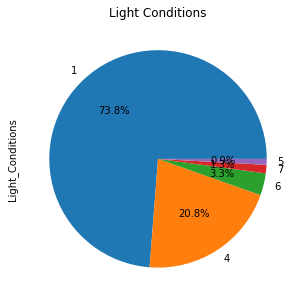

In [30]:
plt.figure()
PieChart = MergdfClean['Light_Conditions'].value_counts()
PieChart.plot(kind='pie',autopct='%1.1f%%', title='Light Conditions',
         figsize=(6, 5))

plt.show()

Here 1 means the daylight. More number of accidents have been recorded during daylight. It might be because of more number of vehicles in day. The second highest is 4 (Lights lit) which is about 21.3%

### (e)	What impact, if any, does sunrise and sunset times have on road traffic accidents?

In [31]:
MergdfClean.dropna(subset = ['Time'], inplace= True)

In [32]:
MergdfClean['Hour'] = MergdfClean['Time'].apply(lambda x : int(str(x).split(':')[0]))
# MergdfClean['Date'] = pd.to_datetime(MergdfClean['Date'], format='%d/%m/%y').dt.date
MergdfClean['Time'] = pd.to_datetime(MergdfClean['Time'], format='%H:%M').dt.time
MergdfClean['Month'] = pd.DatetimeIndex(MergdfClean['Date']).month

byHour = MergdfClean[['Hour','Accident_Index']].groupby('Hour').count()
byHour['Accident_Index'] = byHour['Accident_Index'].apply(lambda x: x/366) # Transform total to per day value


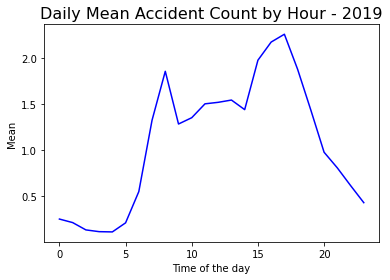

In [33]:
plt.figure
plt.plot(byHour.index, byHour['Accident_Index'], c='b')
plt.title('Daily Mean Accident Count by Hour - 2019', fontsize=16)
plt.xlabel("Time of the day")
plt.ylabel("Mean")
plt.show()

Figure shows that there is a peak in average accidents at Sunrise and at Sunset. Usually the morning and evening time of the day is considered as rush times. There is very low number of accident at night because of no rush at that time. 

#### Daily Mean accident by hour including Casualities

In [34]:
MergdfWithCasuality.dropna(subset = ['Time'], inplace= True)
MergdfWithCasuality['Hour'] = MergdfWithCasuality['Time'].apply(lambda x : int(str(x).split(':')[0]))
# MergdfClean['Date'] = pd.to_datetime(MergdfClean['Date'], format='%d/%m/%y').dt.date
MergdfWithCasuality['Time'] = pd.to_datetime(MergdfWithCasuality['Time'], format='%H:%M').dt.time
MergdfWithCasuality['Month'] = pd.DatetimeIndex(MergdfWithCasuality['Date']).month



In [36]:
byHourCas = MergdfWithCasuality[['Hour','Accident_Index']].groupby('Hour').sum()
byHourCas['Accident_Index'] = byHour['Accident_Index'].apply(lambda x: x/366) # Transform total to per day value


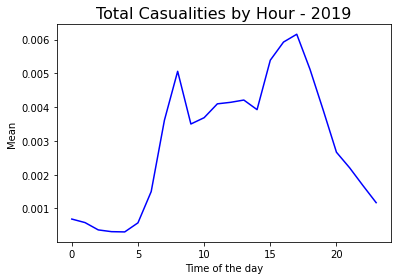

In [40]:
plt.figure
plt.plot(byHourCas.index, byHourCas['Accident_Index'], c='b')
plt.title('Total Casualities by Hour - 2019', fontsize=16)
plt.xlabel("Time of the day")
plt.ylabel("Mean")
plt.show()


### (f)	Are there particular types of vehicles (engine capacity, age of vehicle, etc.) that are more frequently involved in road traffic accidents?

1         1
48        1
49       54
50       17
89        2
         ..
12809    10
12882     1
12900     7
12902    10
14500     1
Name: Engine_Capacity_(CC), Length: 476, dtype: int64

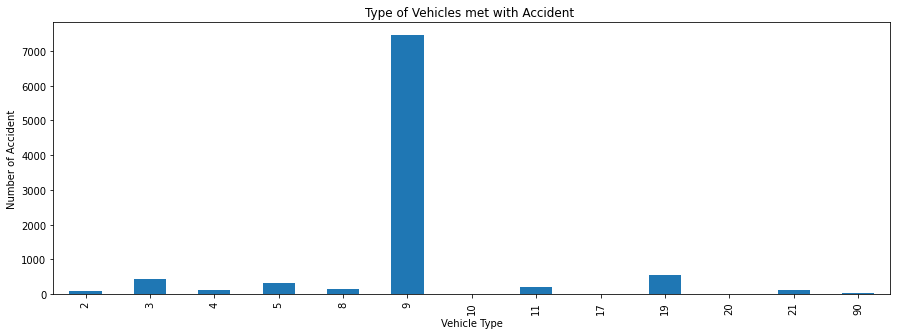

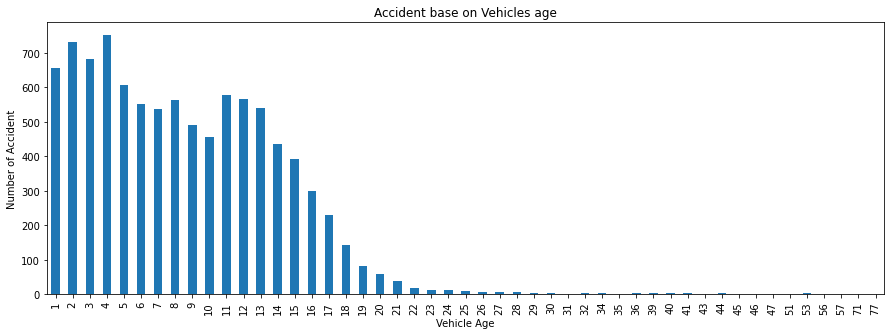

In [41]:
plt.figure()

VehicleType = MergdfClean['Vehicle_Type'].value_counts().sort_index()
VehicleType.plot(kind='bar', title='Type of Vehicles met with Accident ', ylabel='Number of Accident',
         xlabel='Vehicle Type',figsize=(15, 5))

plt.figure()
VehicleAge = MergdfClean['Age_of_Vehicle'].value_counts().sort_index()
VehicleAge.plot(kind='bar', title='Accident base on Vehicles age', ylabel='Number of Accident',
         xlabel='Vehicle Age', figsize=(15, 5))

EngineCapacityAccident = MergdfClean['Engine_Capacity_(CC)'].value_counts().sort_index()
EngineCapacityAccident

The engine capacity has highest number of accidents is 1598.

The specific type of vehicle that are more frequently involved in road traffic accidents is car which is represented by number 9.

Furthermore, the second image shows that the Vehicles with age 4 and then 3 are mostly affected by accidents.

### (g)	Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?

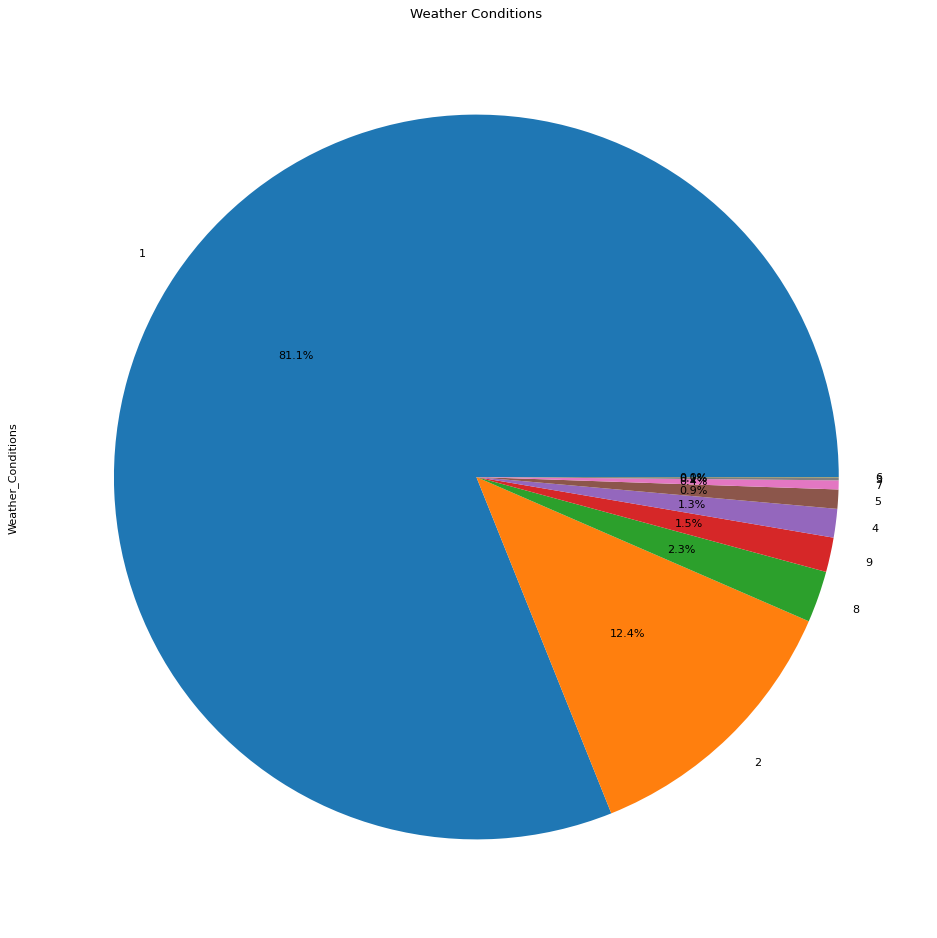

In [42]:
from matplotlib.pyplot import figure
figure(figsize=(15, 15), dpi=80)
PieChart = MergdfClean['Weather_Conditions'].value_counts()
PieChart.plot(kind='pie',autopct='%1.1f%%', title='Weather Conditions',)
plt.show()


Above figures shows the proportion of weather towardes the accidensts. It shows that 1 (Fine no high winds) while the second major contribution to it is 2 (Raining no high winds) which is 12.6%. 

### (h)	How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?

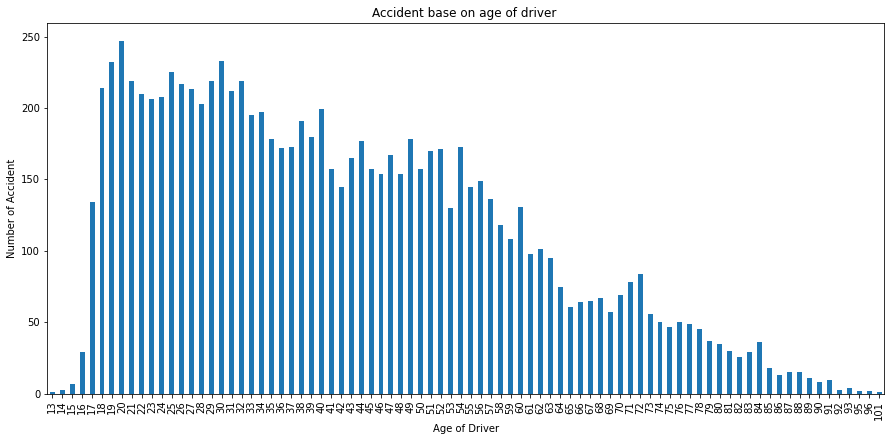

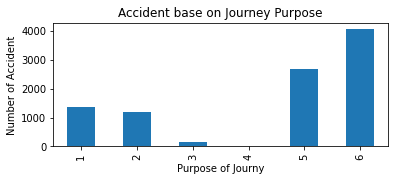

In [43]:
plt.figure()
plt.subplot(211)

DriverAge = MergdfClean['Age_of_Driver'].value_counts().sort_index()
DriverAge.plot(kind='bar', title='Accident base on age of driver ', ylabel='Number of Accident',
       xlabel='Age of Driver',figsize=(15, 15))
plt.show()

plt.figure()
plt.subplot(212)
JouneyPurpose = MergdfClean['Journey_Purpose_of_Driver'].value_counts().sort_index()
JouneyPurpose.plot(kind='bar', title='Accident base on Journey Purpose', ylabel='Number of Accident',
         xlabel='Purpose of Journy', figsize=(6, 5))
plt.show()

First image illustrates the number of accidents based on the age of the driver. It further shows that younger people around age 20,24,27 and 30 are more likely met with accidents. 

Furthermore, the second image shows that majority of people met with accidents is recorded for "Not known" (6). While the second highest reason of journey is other (5) and the the third highest journey purpose where people met with accident is "as part of their work (1)". 

#### Age and Purpose of Jounrey of the Casualities

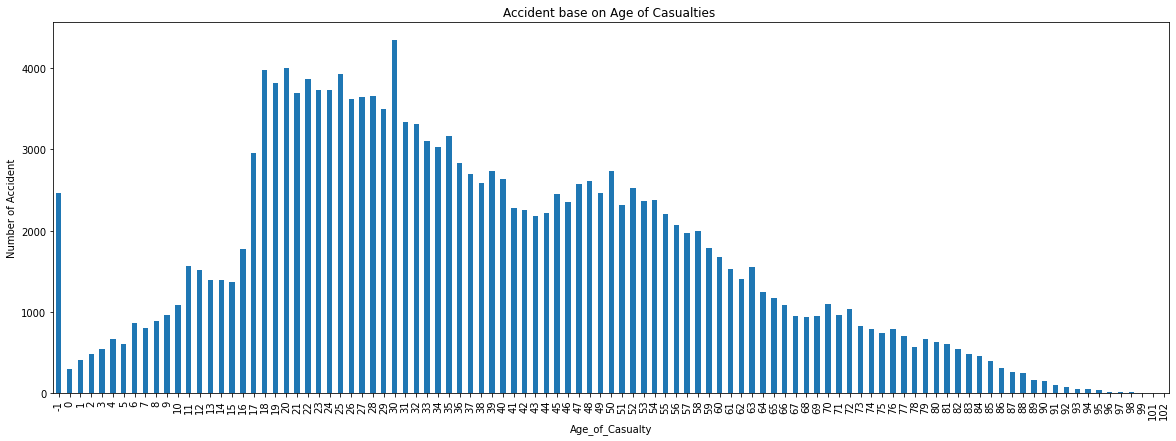

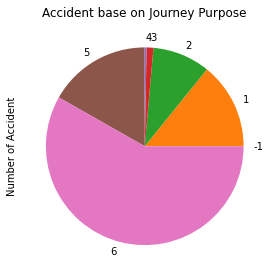

In [44]:
plt.figure()
plt.subplot(211)

DriverAge = MergdfWithCasuality['Age_of_Casualty'].value_counts().sort_index()
DriverAge.plot(kind='bar', title='Accident base on Age of Casualties ', ylabel='Number of Accident',
       xlabel='Age_of_Casualty',figsize=(20, 15))
plt.show()

plt.figure()
plt.subplot(212)
JouneyPurpose = MergdfWithCasuality['Journey_Purpose_of_Driver'].value_counts().sort_index()
JouneyPurpose.plot(kind='pie', title='Accident base on Journey Purpose', ylabel='Number of Accident',
         xlabel='Purpose of Journy', figsize=(10, 10))
plt.show()

Above bar charts shows the casualties ages with number of accidence. It also illustrates that more casualties occure between 18 and 33. There is another little peak between the age of 45 to 55. More number people died at this age. Furthermore, the pie charts shows purpose of journey for each casuality. It shows the major contribution to it type 6 (not known). The third major contribution to casuality is 1 (journey as part of their work). 

### (i)	Can we make predictions about when and where accidents will occur, and the severity of the injuries sustained from the data supplied to improve road safety? How well do our models compare to government models? 

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

dfActual = pd.read_csv("Road Safety Data - Accidents 2019.csv", low_memory = False)

In [46]:
dfSeverity = dfActual[['Accident_Severity', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions']]
dfClean = dfSeverity[dfSeverity.select_dtypes(include=[np.number]).ge(0).all(1)]
dfClean = dfClean.dropna() 

In [47]:
dfClean

,Accident_Severity,Light_Conditions,Weather_Conditions,Road_Surface_Conditions
0,3,1,1,1
1,3,4,1,1
2,3,4,1,1
3,2,4,1,1
4,3,4,1,1
...,...,...,...,...
117531,3,1,1,2
117532,3,1,1,2
117533,3,1,1,1
117534,3,1,1,1


In [48]:
df = dfClean.values

In [49]:
# split data into input and output columns
X, y = df[:, :-1], df[:, -1]

In [50]:
# split data into train and test sets
seed = 7
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [51]:
#Train the model using the training sets
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [52]:
print("Accuracy of the model is:",round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')

Accuracy of the model is: 83.31 %


We can see that this model has an accuracy of around 83%. The model we have developed is based on Light Conditions, Weather Conditions, and Road Surface Conditions to predict the severity of accidents.

In [53]:
dfWhere = dfActual[['Road_Type', 'Speed_limit', 'Carriageway_Hazards', 'Urban_or_Rural_Area']]
dfClean = dfWhere[dfWhere.select_dtypes(include=[np.number]).ge(0).all(1)]
dfClean = dfClean.dropna()

In [54]:
dfClean

,Road_Type,Speed_limit,Carriageway_Hazards,Urban_or_Rural_Area
0,1,30,0,1
1,2,30,0,1
2,6,30,0,1
3,6,20,0,1
4,6,30,0,1
...,...,...,...,...
117531,6,60,0,2
117532,6,60,0,2
117533,6,60,0,2
117534,6,30,0,2


In [55]:
df = dfClean.values

In [56]:
# split data into input and output columns
X, y = df[:, :-1], df[:, -1]

In [57]:
# split data into train and test sets
seed = 7
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [58]:
#Train the model using the training sets
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [59]:
print("Accuracy of the model is:",round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')

Accuracy of the model is: 86.43 %


We can see that this model has an accuracy of around 86%. The model we have developed is based on Speed Limit, Carriageway Hazards, and Urban or Rural areas to predict the road type where accidents have occured